In [2]:
from dataloader import load_data
from learning_func import Ranger, scheduler
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization, Activation, AveragePooling2D, Input, Flatten, add, Dropout
from tensorflow.keras.models import Sequential
from tensorflow import keras
#!pip install -U tensorflow-addons
import tensorflow_addons as tfa
from tensorflow.keras.callbacks import EarlyStopping     


print(tf.config.list_physical_devices('GPU'))

#from tensorflow.python.client import device_lib
#print(device_lib.list_local_devices())


train_dir = "C:/Users/jonas/Desktop/HoferThomas/Dataset_Resnet_small"
val_dir = "C:/Users/jonas/Desktop/HoferThomas/Dataset_Resnet_small"

train_ds, val_ds, class_names = load_data(train_dir, val_dir)
print(class_names)


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]
Found 10542 files belonging to 2 classes.
Using 8434 files for training.
Found 10542 files belonging to 2 classes.
Using 2108 files for validation.
['Flight', 'Landing']


In [29]:
pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(270,480,3),
                   pooling='avg',classes=2,
                   weights='imagenet')




for layer in pretrained_model.layers:
        layer.trainable=False

devices = tf.config.experimental.list_physical_devices()
mirrored_strategy = tf.distribute.MirroredStrategy()


resnet_model = Sequential()
resnet_model.add(pretrained_model)
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dropout(0.2))
resnet_model.add(Dense(1, activation='sigmoid'))

resnet_model.summary()


save_callback = EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=50,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

lr_scheduler = keras.callbacks.LearningRateScheduler(scheduler, verbose=1)

resnet_model.compile(optimizer=Ranger(), loss='binary_crossentropy', metrics=['accuracy'])


epochs=100

history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  shuffle=True,
  batch_size = 50,
  callbacks=[save_callback]
)


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1')


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1')


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_16 (Dense)            (None, 512)               1049088   
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_17 (Dense)            (None, 1)                 513       
                                                                 
Total params: 24,637,313
Trainable params: 1,049,601
Non-trainable params: 23,587,712
_________________________________________________________________
Epoch 1/100
169/169 [==============================] - 77s 434ms/step - loss: 0.6908 - accuracy: 0.5523 - val_loss: 0.6369 - val_accuracy: 0.6010
Epoch 2/100
169/169

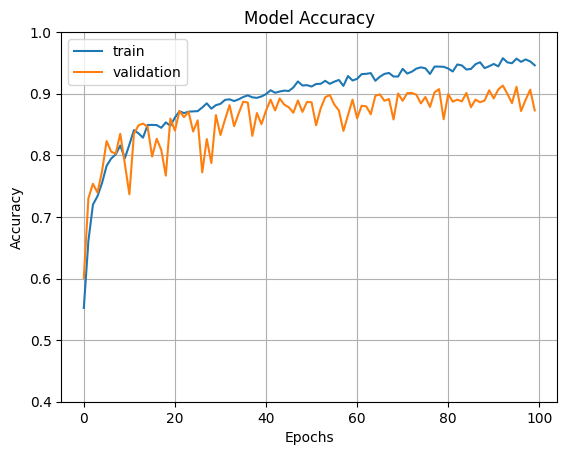

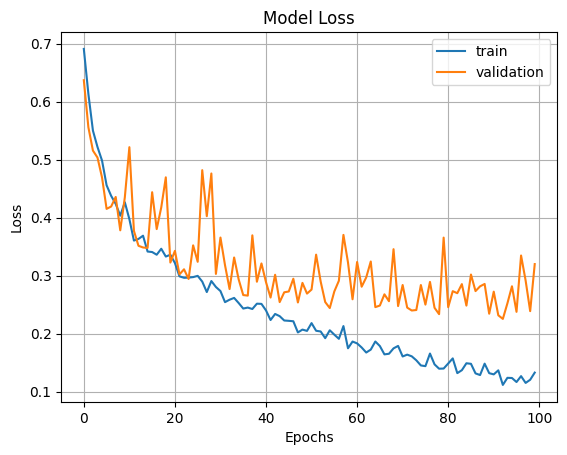

In [30]:
import matplotlib.pyplot as plt
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [31]:
from datetime import datetime
now = datetime.now() # current date and time
date_time = now.strftime("%m-%d-%Y_%H-%M-%S")
print("date and time:",date_time)	

resnet_model.save('C:/Users/jonas/Desktop/HoferThomas/Repositories/Resnet_Models/' + date_time + '_model_dense_' + str(epochs))


date and time: 03-03-2023_17-28-30


INFO:tensorflow:Assets written to: C:/Users/jonas/Desktop/HoferThomas/SJ_Resnet/03-03-2023_17-28-30_model_dense_100\assets


INFO:tensorflow:Assets written to: C:/Users/jonas/Desktop/HoferThomas/SJ_Resnet/03-03-2023_17-28-30_model_dense_100\assets
